In [24]:
import threading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



columns = ["Website",'test_name', 'HTTP status code', "Success", "Redirected to ISP Payload"]
df = pd.DataFrame(columns=columns)

text_file = "../../../BlockingLists/russianWebsites.txt"


cyta_payload = "This site can’t be reached due tο compliance the Council Regulation (EU) 350/2022 and with EU and National Laws, only for as long as necessary."


def find_payload(text):
   if cyta_payload in text:
       return True
   else: 
       return False

In [25]:
import requests
import socket
import ssl

html_file_with_results = "result.html"
txt_file_with_results = "result.txt"
logs_file = "result.log"


def write_to_file(filename, data):
    with open(filename, "w") as f:
        f.write("%s\n" % data)




def send_request(
        host, port,
        fragment_size=0, fragment_count=0, is_https=True):
    try:
        if is_https:
            url = f"https://{host}:{port}"
        else:
            url = f"http://{host}:{port}"
        
        response = requests.get(url)
        df.loc[len(df)] = {
                "Website": url,
                "test_name": "test_warp",
                "HTTP status code": response.status_code,
                "Success": response.status_code == 200,
                "Redirected to ISP Payload": find_payload(response.text)
        }
        print(response.text)
        recv_decoded = response.text
        print(recv_decoded)
        return recv_decoded
    except requests.exceptions.ReadTimeout as e:
        print(f"ReadTimeout occurred: {e}")
        return None
    except Exception as e:
        print(f"Error occurred: {e}")
        return None






def trucate_https(domain):
    domain = domain.replace("https://", "")
    domain = domain.replace("http://", "")
    domain = domain.replace("www.", "")
    if domain.endswith("/"):
        domain = domain[:-1]
    return domain


def get_redirection(url, timeout=3):
    try:
        response = requests.get(f"http://{url}", allow_redirects=False, timeout=timeout)
    except requests.exceptions.ConnectTimeout:
        print("Connection timed out while trying to reach the server.")
        return None, False
    max_redirects = 10
    num_redirects = 0
    redirect_url = f"http://{url}"
    is_https = False
    while response.is_redirect or response.is_permanent_redirect:
        if num_redirects >= max_redirects:
            print("Reached maximum number of redirects.")
            break

        redirect_url = response.headers['Location']
        if redirect_url.find("https") != -1:
            is_https = True
        print(f"Redirecting to: {redirect_url}")
        try:
            response = requests.get(redirect_url, allow_redirects=False, timeout=timeout)
        except requests.exceptions.ConnectTimeout:
            print("Connection timed out while trying to reach the server.")
            return None, False
        except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")
            return None, False
        num_redirects += 1
    redirect_url = trucate_https(redirect_url)
    print(redirect_url)
    return redirect_url, is_https


def test_http_or_https(site):
    site, is_https_required = get_redirection(site)
    if is_https_required:
        port = 443
    else:
        port = 80
    return send_request(site, port=port, is_https=is_https_required)




In [26]:
def test_sites_from_file(filename):
    with open(filename, "r") as file:
        websites = [line.strip() for line in file]

    threads = []
    for site in websites:
        thread = threading.Thread(target=process_site, args=(site,))
        thread.start()
        threads.append(thread)
    for thread in threads:
        thread.join()


def process_site(site):
    test_http_or_https(site)
    
    
# def test_sites_from_file(filename):
#     with open(filename, "r") as file:
#         websites = [line.strip() for line in file]
# 
#     for site in websites:
#         process_site(site)
# 
# 
# def process_site(site):
#     test_http_or_https(site)


test_sites_from_file(text_file)     

Redirecting to: https://vk.com/
Redirecting to: https://gosuslugi.ru/
Redirecting to: http://tass.ru/
Redirecting to: https://svpressa.ru/
Redirecting to: https://russian.rt.com/
Redirecting to: https://lenta.ru/
Redirecting to: https://regnum.ru/
Redirecting to: https://rt.com/
Redirecting to: https://www.vesti.ru/
Redirecting to: https://ria.ru/
Redirecting to: https://vz.ru/
Redirecting to: https://iz.ru/
Redirecting to: https://mos.ru/
Redirecting to: https://rg.ru
Redirecting to: https://voskhod.ru/
Redirecting to: https://www.nalog.gov.ru/
Redirecting to: https://www.rt.ru/
Redirecting to: http://tass.ru/
aeroflot.ru
Redirecting to: https://admburla.ru/
Redirecting to: http://tass.ru/
<!DOCTYPE html><html lang=en><head><meta charset="utf-8" /><meta name=viewport content="width=device-width, initial-scale=1" /><style>body{box-sizing:border-box;display:flex;height:100vh;margin:0;padding:0;text-align:center;font-family:sans-serif;font-weight:normal;font-size:16px;line-height:160%;co

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

Exception in thread Thread-62 (process_site):
Traceback (most recent call last):
  File "/home/dmitrii/.local/lib/python3.10/site-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
  File "/home/dmitrii/.local/lib/python3.10/site-packages/urllib3/connection.py", line 466, in getresponse
    httplib_response = super().getresponse()
  File "/usr/lib/python3.10/http/client.py", line 1375, in getresponse
    response.begin()
  File "/usr/lib/python3.10/http/client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.10/http/client.py", line 279, in _read_status
    line = str(self.fp

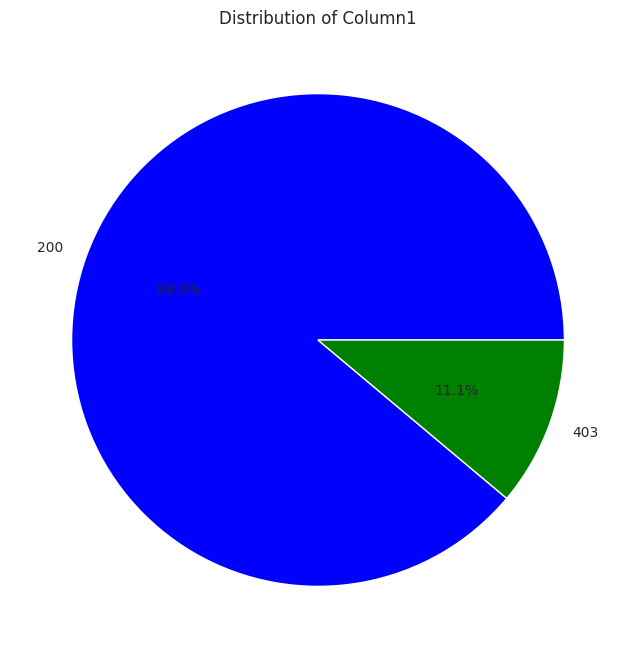

In [27]:
plt.figure(figsize=(8, 8))
df['HTTP status code'].value_counts().plot(kind='pie', autopct='%1.1f%%',  colors=['blue', 'green', 'coral', 'lightskyblue', 'lightpink'])
plt.title('Distribution of Column1')
plt.ylabel('')
plt.show()



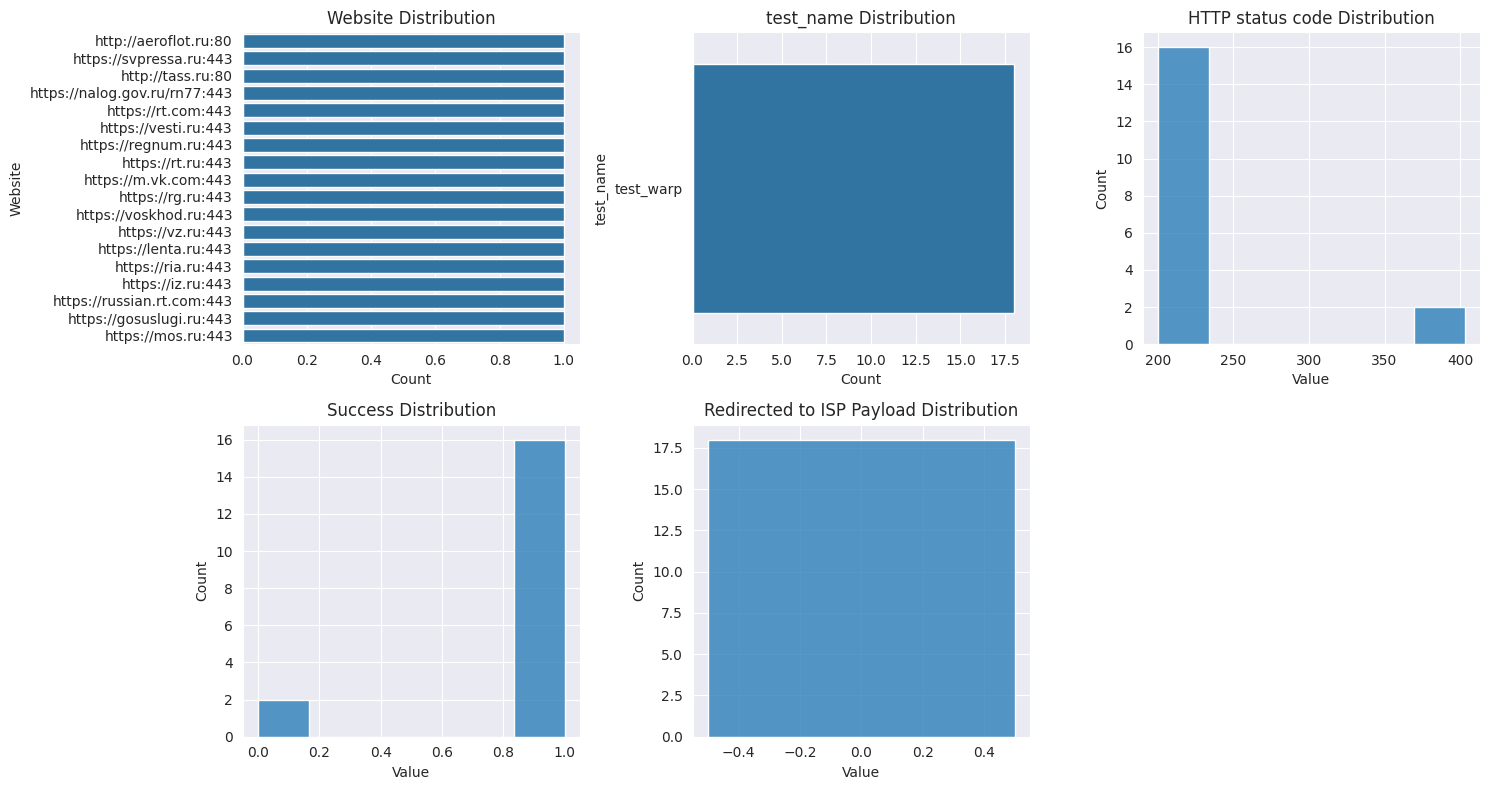

In [28]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    if df[column].dtype == 'object':
        sns.countplot(data=df, y=column, order=df[column].value_counts().index)
    else:
        sns.histplot(data=df, x=column)
    plt.title(f'{column} Distribution')
    plt.xlabel('Count' if df[column].dtype == 'object' else 'Value')

plt.tight_layout()
plt.show()

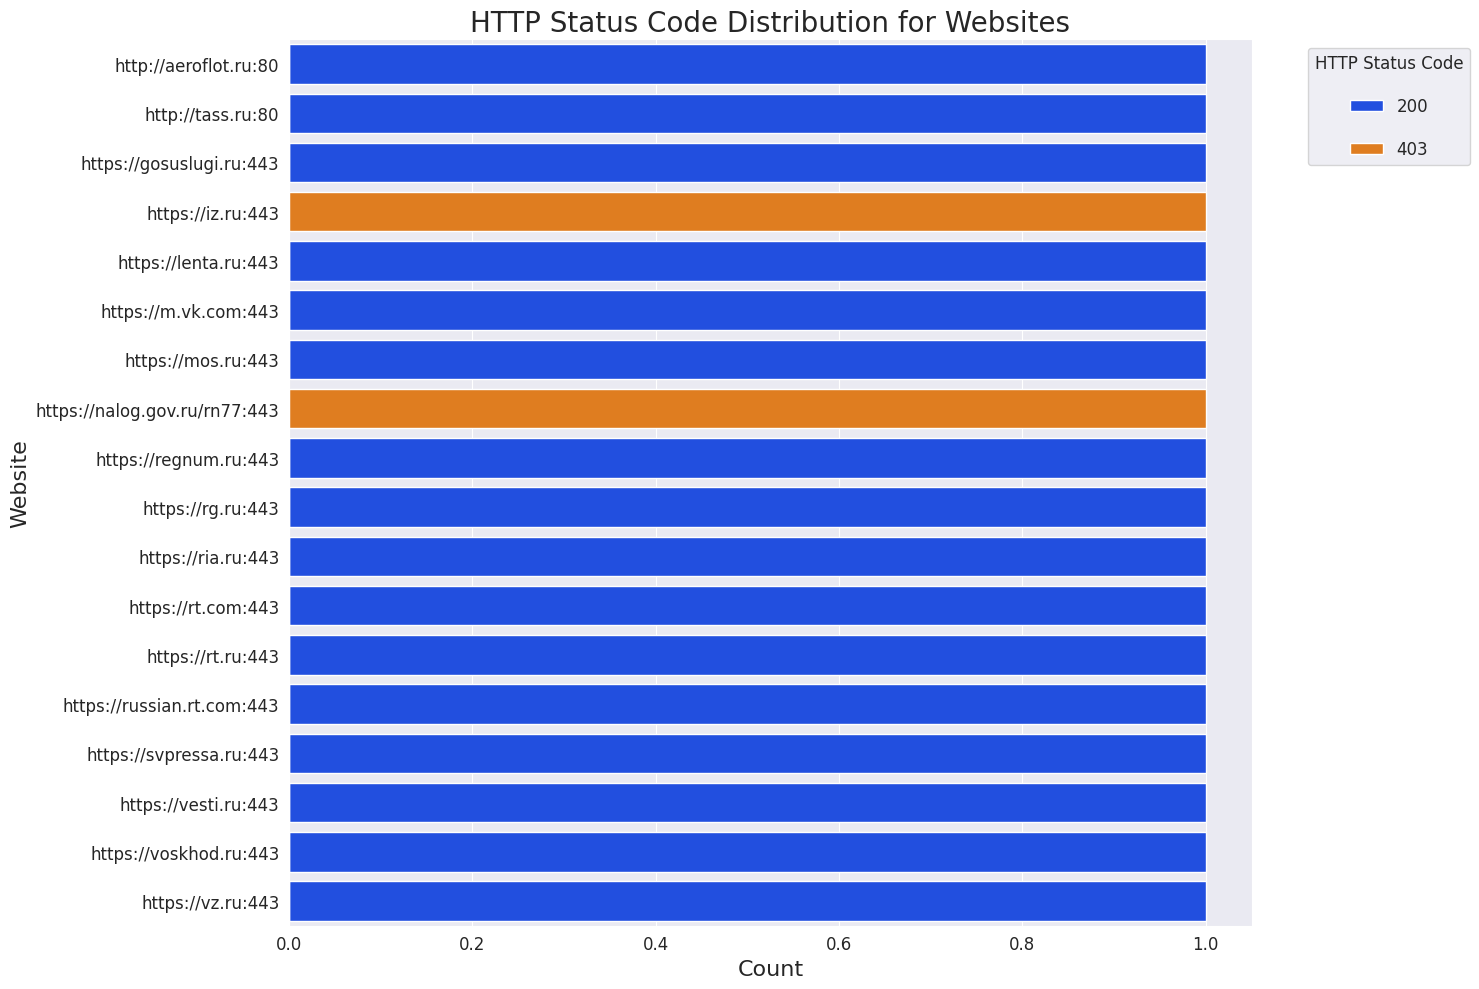

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

website_status_counts = df.groupby(['Website', 'HTTP status code']).size().unstack(fill_value=0)

colors = sns.color_palette('bright', len(website_status_counts.columns))

plt.figure(figsize=(15, 10))
for http_status_code, data, color in zip(website_status_counts.columns, website_status_counts.values.T, colors):
    sns.barplot(x=data, y=website_status_counts.index, color=color, label=http_status_code)

plt.title('HTTP Status Code Distribution for Websites', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Website', fontsize=16)
plt.legend(title='HTTP Status Code', title_fontsize='large', fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', labelspacing=1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig('http_status_code_distribution.png', dpi=300)
plt.show()


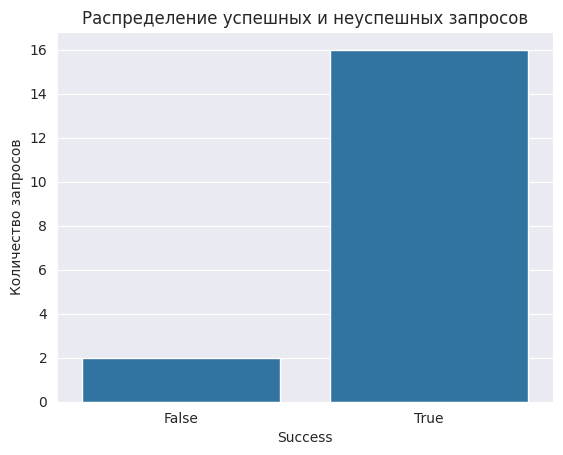

In [30]:
sns.countplot(x='Success', data=df)
plt.title('Распределение успешных и неуспешных запросов')
plt.xlabel('Success')
plt.ylabel('Количество запросов')
plt.show()


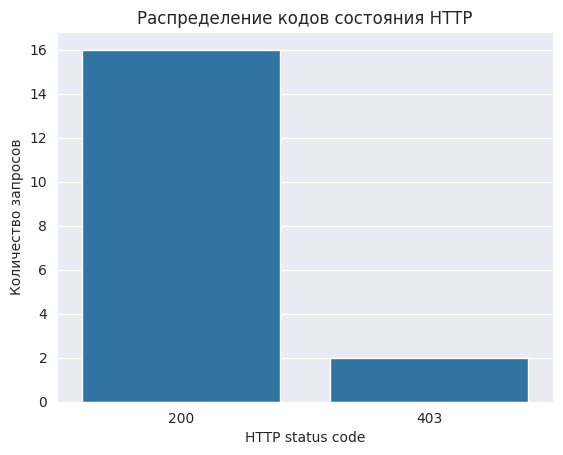

In [31]:
sns.countplot(x='HTTP status code', data=df)
plt.title('Распределение кодов состояния HTTP')
plt.xlabel('HTTP status code')
plt.ylabel('Количество запросов')
plt.show()


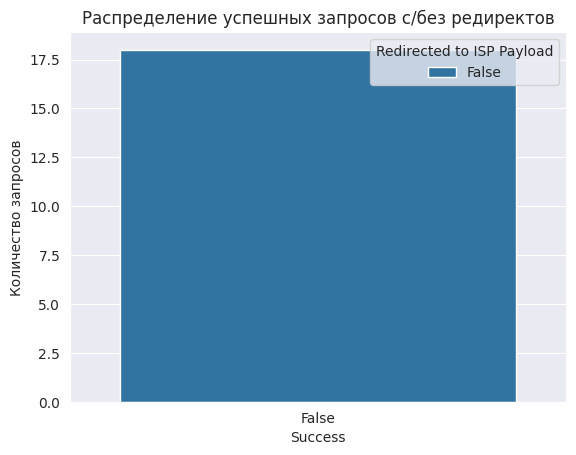

In [34]:
sns.countplot(x='Redirected to ISP Payload', hue='Redirected to ISP Payload', data=df)
plt.title('Распределение успешных запросов с/без редиректов')
plt.xlabel('Success')
plt.ylabel('Количество запросов')
plt.show()


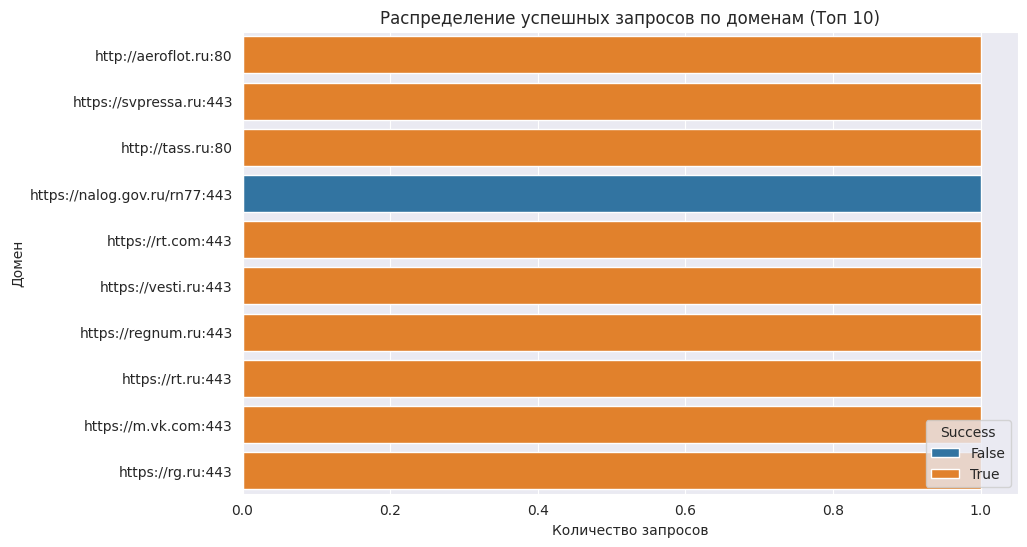

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(y='Website', hue='Success', data=df, order=df['Website'].value_counts().index[:10])
plt.title('Распределение успешных запросов по доменам (Топ 10)')
plt.xlabel('Количество запросов')
plt.ylabel('Домен')
plt.legend(title='Success', loc='lower right')
plt.show()


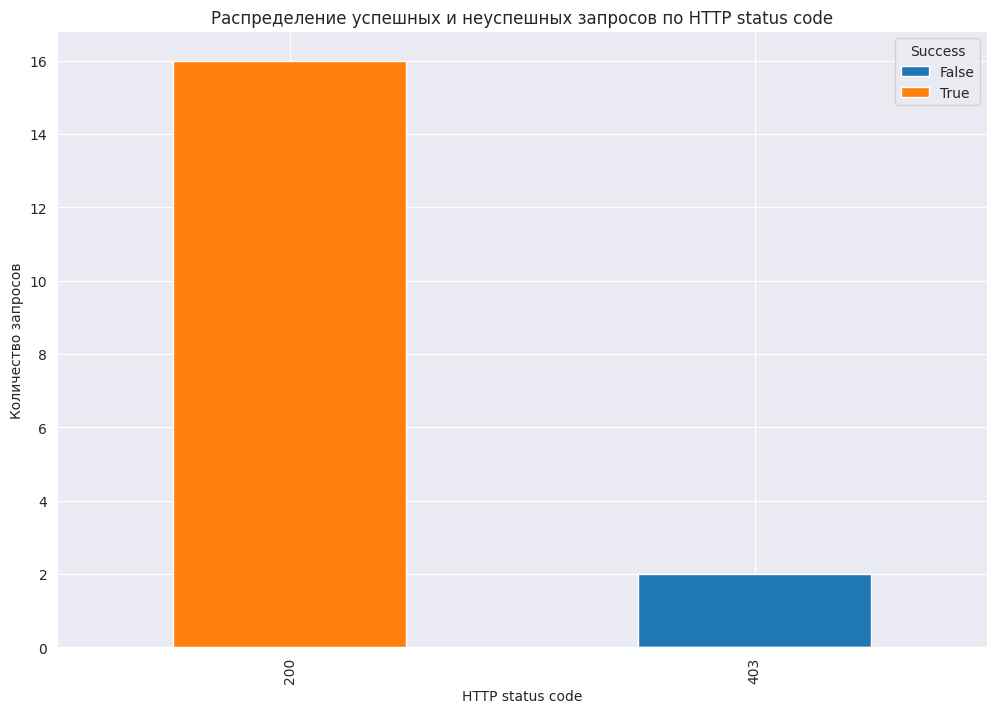

In [36]:
http_status_counts = df.groupby(['HTTP status code', 'Success']).size().unstack(fill_value=0)

http_status_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Распределение успешных и неуспешных запросов по HTTP status code')
plt.xlabel('HTTP status code')
plt.ylabel('Количество запросов')
plt.legend(title='Success', loc='upper right')
plt.show()
